# Центральная предельная теорема своими руками

## Постановка задачи
- оценить распределение выборочного среднего выбранной случайной величины при разных объёмах выборок;
- описать разницу между полученными распределениями при различных значениях n.



## Решение
    Подключаем необходимые модули:

In [15]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
import scipy.stats as sts
%matplotlib inline

    В качестве распредения выбрано бета-распределение. Задаем его параметры a и b, генерируем выборку размера 1000:

In [16]:
a = 2
b = 4
sample = beta.rvs(a, b, size = 1000)

    Строим гистограмму выборки, а поверх нее рисуем теоретическую плотность распределения:

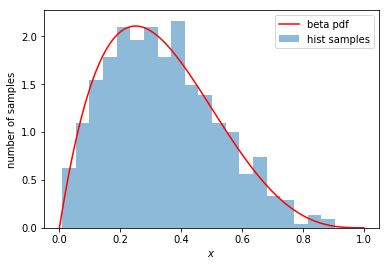

In [17]:
plt.hist(sample, density=True, bins=20, alpha=0.5, label='hist samples')
plt.ylabel('number of samples')
plt.xlabel('$x$')
x = np.linspace(0, 1, 100)
plt.plot(x, beta.pdf(x, a, b),'r-', label='beta pdf')
plt.legend(loc='best')

    Задаем функцию для удобного расчета средних по n выборкам и построения графиков:

In [18]:
def f(n):
    a = 2 #определяем параметры распределения и создаем пустой np массив
    b = 4
    vals = np.zeros(shape = [1000, n]) 
    
    for i in range(1000): #забиваем в массив 1000 выборок объема n
        vals[i] = np.array([beta.rvs(a, b, size=n)])
    mean_val = vals.mean(axis=1) #считаем среднее по выбоорками
    
    plt.hist(mean_val, density=True, alpha=0.5, label='mean_values') #рисуем гистограмму
    plt.ylabel('number of samples')
    plt.xlabel('$x$')
    
    Dx = (float(a)*b)/(((float(a)+b)**2.)*(a+b+1.)) #считаем дисперсию, мат. ожидание и сигму
    Ex = float(a)/(a+b)
    sigma = (Dx/n)**0.5
    
    norm_rv = sts.norm(loc=Ex, scale=sigma) #строим график нормального распределения
    x = np.linspace(0, 1, 100)
    pdf = norm_rv.pdf(x)
    
    plt.plot(x, pdf, 'r-', alpha=0.7, label='density')
    plt.legend(loc='best')

## Искомые графики:

    n = 5

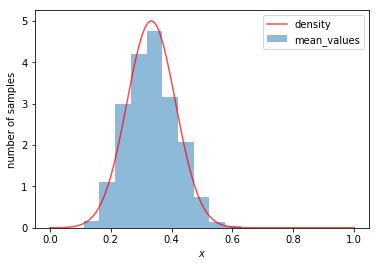

In [19]:
f(5)

    n = 10

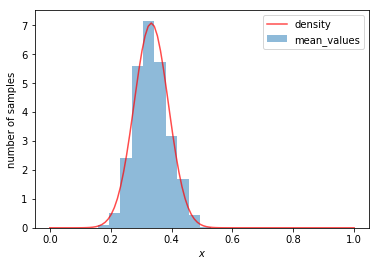

In [20]:
f(10)

    n = 50

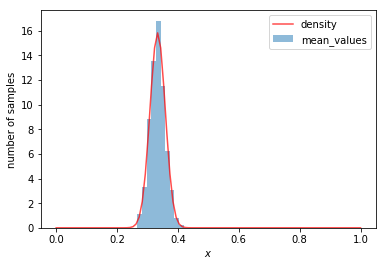

In [21]:
f(50)

## Вывод
Вывод следует из постановки задачи - центральная предельная теорема действительно работает. Чем больше объем выборки, тем лучше удается приблизить ее нормальным распределением.